# Fitting of a centroid on a peptide during refolding

One peptide (residue 24-42, one charged state) is extracted from DynamX (identified using PLGS) and at each refolding timepoint centroid is fitted based on the isotope peaks 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

In [2]:
df = pd.read_excel("peptide 24_42_4Cfolding_ppiA.xlsx", skiprows=[0, 1], header=[0])
df = df.dropna(how='any')

#Making a library with indexes
series_dict = {}
for i, col in enumerate(df):
    if i % 2 == 0:
        idx = df.iloc[:, i]
        data = df.iloc[:, i + 1]
        data.index = idx
        data /= np.trapz(data, data.index)

        series_dict[data.name] = data

Text(0.5, 0, 'm/z')

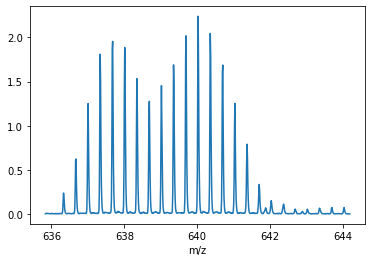

In [3]:
#Selection of one timepoint to fit gaussian
s = series_dict['20sec_1']
fig, ax = plt.subplots()
ax.plot(s.index, s)
ax.set_xlabel('m/z')


In [4]:
#Calculation of centroid
centroid = np.average(s.index, weights=s)
centroid

639.2275791326051

Text(0.5, 0, 'm/z')

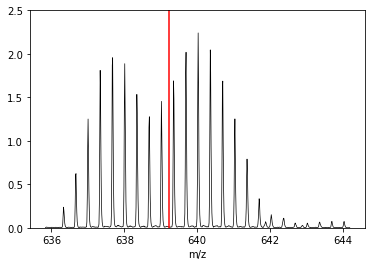

In [5]:
#
fig, ax = plt.subplots()
ax.plot(s.index, s, color ='k', linewidth=0.7)
#ax.scatter(xp, yp, color='r')
#ax.plot(x_vec, y_vec[0],color='r')
ax.set_ylim(0,2.5)
ax.axvline(centroid, color='r')
ax.set_xlabel('m/z')